**1. Proje Tanƒ±tƒ±mƒ±**
Bu proje, ƒ∞ngiltere merkezli bir √ßevrimi√ßi perakende verisini analiz ederek m√º≈üteri davranƒ±≈ülarƒ±nƒ± anlamayƒ± ve i≈ü stratejileri geli≈ütirmeyi ama√ßlamaktadƒ±r. Proje, a≈üaƒüƒ±daki adƒ±mlarƒ± i√ßerir:
- Veri temizleme ve ke≈üifsel veri analizi (**Exploratory Data Analysis - EDA**).
- **RFM Analysis** ile m√º≈üteri segmentasyonu.
- **K-Means Clustering** kullanarak m√º≈üteri segmentasyonu.
- **Cohort Analysis** ile m√º≈üteri tutma oranlarƒ±nƒ±n analizi.

---

**2. Veri Seti Bilgisi**
**Veri Seti √ñzellikleri:**
- **InvoiceNo**: Fatura numarasƒ± (6 haneli, her i≈ülem i√ßin benzersiz).
- **StockCode**: √úr√ºn veya stok kodu (5 haneli, her √ºr√ºn i√ßin benzersiz).
- **Description**: √úr√ºn a√ßƒ±klamasƒ±.
- **Quantity**: Satƒ±lan √ºr√ºn miktarƒ±.
- **InvoiceDate**: Fatura tarihi ve saati.
- **UnitPrice**: √úr√ºn birim fiyatƒ± (sterlin).
- **CustomerID**: M√º≈üteri numarasƒ± (5 haneli).
- **Country**: M√º≈üterinin bulunduƒüu √ºlke.

---

**3. Proje Yapƒ±sƒ±**
1. **Data Cleaning and Exploratory Data Analysis**
   - Veride eksik deƒüerleri ve g√ºr√ºlt√ºleri tespit etme.
   - Veriyi temizleme ve g√∂rselle≈ütirme.
   - Fatura, √ºr√ºn ve √ºlke bazƒ±nda analizler yapma.

2. **RFM Analysis & Customer Segmentation**
   - **Recency** (son satƒ±n alma), **Frequency** (satƒ±n alma sƒ±klƒ±ƒüƒ±) ve **Monetary** (harcama tutarƒ±) deƒüerlerini hesaplama.
   - **RFM Table** olu≈üturma ve m√º≈üterileri segmentlere ayƒ±rma.
   - RFM skorlarƒ±na dayalƒ± segmentasyon.
   - En iyi m√º≈üteriler, kayƒ±p m√º≈üteriler gibi kategoriler olu≈üturma.

4. **K-Means Clustering**
   - √ñzellik m√ºhendisliƒüi (**Feature Engineering**) ve normalizasyon.
   - K√ºmeleri belirlemek i√ßin **Elbow Method** ve **Silhouette Analysis** y√∂ntemlerini kullanma.
   - Sonu√ßlarƒ± g√∂rselle≈ütirme.

5. **Cohort Analysis**
   - Satƒ±n alma tarihlerini kullanarak m√º≈üteri gruplarƒ± (**cohortlar**) olu≈üturma.
   - Cohort tablosu ile m√º≈üteri tutma oranlarƒ±nƒ± analiz etme.

---

**5. √áƒ±ktƒ±lar ve Beklentiler**
- **RFM Analysis**‚Äôe dayalƒ± m√º≈üteri segmentasyon tablosu.
- **K-Means Clustering** ile g√∂rselle≈ütirilmi≈ü m√º≈üteri k√ºmeleri.
- **Cohort Analysis** ile m√º≈üteri tutma oranlarƒ±nƒ±n g√∂rselle≈ütirilmesi.

---

# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Veri setini y√ºkleme
df = pd.read_excel("Online Retail.xlsx", engine="openpyxl")

In [6]:
# Veri setine genel bakƒ±≈ü
print("Veri Seti ƒ∞lk 5 Satƒ±r:")
print(df.head())
print("\nVeri Seti Bilgileri:")
print(df.info())
print("\nEksik Deƒüerler:")
print(df.isnull().sum())

Veri Seti ƒ∞lk 5 Satƒ±r:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count

In [7]:
# Eksik deƒüerleri ele alma
# CustomerID i√ßin eksik deƒüerleri ≈üimdilik bƒ±rakƒ±yoruz, RFM analizinde ele alacaƒüƒ±z.
# Description i√ßin eksik deƒüerleri 'Bilinmiyor' ile dolduruyoruz.
df['Description'].fillna('Bilinmiyor', inplace=True)

In [8]:
# Aykƒ±rƒ± deƒüerleri temizleme
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [9]:
# CustomerID'yi integer'a d√∂n√º≈üt√ºrme (hata kontrol√º ile)
try:
    df['CustomerID'] = df['CustomerID'].dropna().astype(int)
    df.dropna(subset=['CustomerID'], inplace=True)  # Eksik CustomerID'leri sil
except ValueError:
    print("Uyarƒ±: CustomerID s√ºtununda sayƒ±sal olmayan deƒüerler bulundu. D√∂n√º≈ü√ºm yapƒ±lamadƒ±.")

In [10]:
# InvoiceDate'i datetime'a d√∂n√º≈üt√ºrme
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
# Toplam fiyatƒ± hesaplama
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [12]:
# Veri temizleme sonrasƒ± kontrol
print("\nVeri Temizleme Sonrasƒ±:")
print("\nEksik Deƒüerler:")
print(df.isnull().sum())
print("\nNegatif Miktar Kontrol√º:", (df['Quantity'] <= 0).sum())
print("\nNegatif/Sƒ±fƒ±r Fiyat Kontrol√º:", (df['UnitPrice'] <= 0).sum())


Veri Temizleme Sonrasƒ±:

Eksik Deƒüerler:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

Negatif Miktar Kontrol√º: 0

Negatif/Sƒ±fƒ±r Fiyat Kontrol√º: 0


# RFM Analysis

**RFM Analizi Nedir?**

RFM analizi, m√º≈üteri davranƒ±≈ülarƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lan bir pazarlama teknik ve y√∂ntemidir. 

RFM, Recency (Yenilik), Frequency (Sƒ±klƒ±k) ve Monetary (Parasal Deƒüer) kelimelerinin ba≈ü harflerinden olu≈üur.

**RFM bile≈üenleri:**

- **Recency (Yenilik):** M√º≈üterinin son satƒ±n alma i≈ülemini ger√ßekle≈ütirdiƒüi tarihin ne kadar yakƒ±n olduƒüunu g√∂sterir. Daha yeni satƒ±n almƒ±≈ü m√º≈üteriler, daha y√ºksek bir recency skoruna sahiptir.
  
- **Frequency (Sƒ±klƒ±k):** M√º≈üterinin belirli bir zaman aralƒ±ƒüƒ±nda (genellikle bir yƒ±l i√ßinde) ka√ß satƒ±n alma i≈ülemi ger√ßekle≈ütirdiƒüini g√∂sterir. Daha sƒ±k alƒ±≈üveri≈ü yapan m√º≈üteriler, daha y√ºksek bir frequency skoruna sahiptir.
  
- **Monetary (Parasal Deƒüer):** M√º≈üterinin belirli bir zaman aralƒ±ƒüƒ±nda harcadƒ±ƒüƒ± toplam tutarƒ± ifade eder. Daha y√ºksek tutarda alƒ±≈üveri≈ü yapan m√º≈üteriler, daha y√ºksek bir monetary skoruna sahiptir.

**RFM Analizi Nasƒ±l Yapƒ±lƒ±r?**

1. **M√º≈üteri Verisinin Hazƒ±rlanmasƒ±:** ƒ∞lgili d√∂neme ait m√º≈üteri verisi toplanƒ±r. Bu veriler genellikle m√º≈üteri kimlikleri, satƒ±n alma tarihleri ve tutarlarƒ± i√ßerir.

2. **RFM Skorlarƒ±nƒ±n Hesaplanmasƒ±:** Her bir m√º≈üteri i√ßin Recency, Frequency ve Monetary skorlarƒ± hesaplanƒ±r. Bu skorlar genellikle 1 ila 5 arasƒ±nda bir √∂l√ßekte olabilir. √ñrneƒüin, 5 en iyi (yani, en yeni, en sƒ±k ve en y√ºksek tutarda) m√º≈üteriyi temsil ederken, 1 en k√∂t√º m√º≈üteriyi temsil eder.

3. **M√º≈üteri Segmentasyonu:** RFM skorlarƒ±na g√∂re m√º≈üteriler farklƒ± segmentlere ayrƒ±lƒ±r. √ñrneƒüin, RFM skorlarƒ±nƒ±n kombinasyonlarƒ±na g√∂re "VIP", "Sadƒ±k M√º≈üteri", "Potansiyel M√º≈üteri" gibi segmentler olu≈üturulabilir.

4. **Pazarlama Stratejilerinin Belirlenmesi:** Her bir m√º≈üteri segmenti i√ßin uygun pazarlama stratejileri geli≈ütirilir. √ñrneƒüin, VIP m√º≈üterilere √∂zel indirimler veya sadƒ±k m√º≈üterilere √∂zel te≈üvikler sunulabilir.

**RFM Analizinin Faydalarƒ±:**

- **M√º≈üteri Segmentasyonu:** RFM analizi, m√º≈üterileri farklƒ± gruplara ayƒ±rarak pazarlama stratejilerini ki≈üiselle≈ütirmeye olanak tanƒ±r.
  
- **Sadƒ±k M√º≈üterilerin Tanƒ±mlanmasƒ±:** RFM analizi, sadƒ±k m√º≈üterileri belirlemek ve onlara √∂zel te≈üvikler sunmak i√ßin kullanƒ±labilir.
  
- **Pazarlama Verimliliƒüinin Artƒ±rƒ±lmasƒ±:** M√º≈üterilerin davranƒ±≈ülarƒ±nƒ±n daha iyi anla≈üƒ±lmasƒ±, pazarlama stratejilerinin daha etkili bir ≈üekilde y√∂netilmesine yardƒ±mcƒ± olur.*

In [15]:
from datetime import timedelta

In [16]:
import datetime

In [17]:
refence_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)

rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (refence_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum'))

rfm.head()
rfm

Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40
...             ...        ...       ...
18280.0         278          1    180.60
18281.0         181          1     80.82
18282.0           8          2    178.05
18283.0           4         16   2094.88
18287.0          43          3   1837.28

[4338 rows x 3 columns]

In [18]:
print(rfm.describe())

           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2054.266460
std     100.014169     7.697998    8989.230441
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     307.415000
50%      51.000000     2.000000     674.485000
75%     142.000000     5.000000    1661.740000
max     374.000000   209.000000  280206.020000


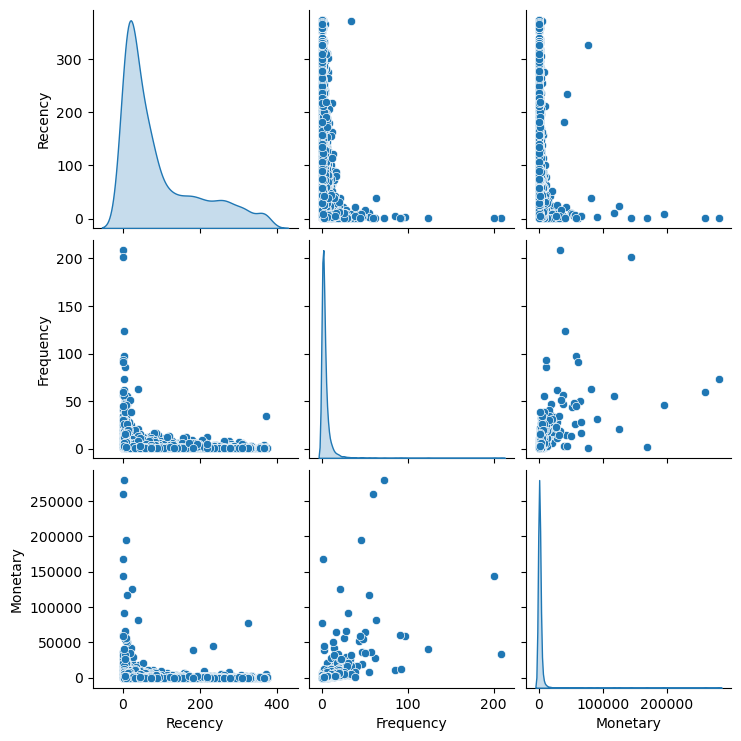

In [19]:
sns.pairplot(rfm, diag_kind='kde')
plt.show()

In [20]:
from scipy.stats import boxcox

rfm_transformed = pd.DataFrame()

rfm_transformed['Recency'], recency_lambda = boxcox(rfm['Recency'])
rfm_transformed['Frequency'], frequency_lambda = boxcox(rfm['Frequency'])
rfm_transformed['Monetary'], monetary_lambda = boxcox(rfm['Monetary'] +1e-6)  # Box-Cox d√∂n√º≈ü√ºm√º i√ßin sƒ±fƒ±rdan b√ºy√ºk olmalƒ±

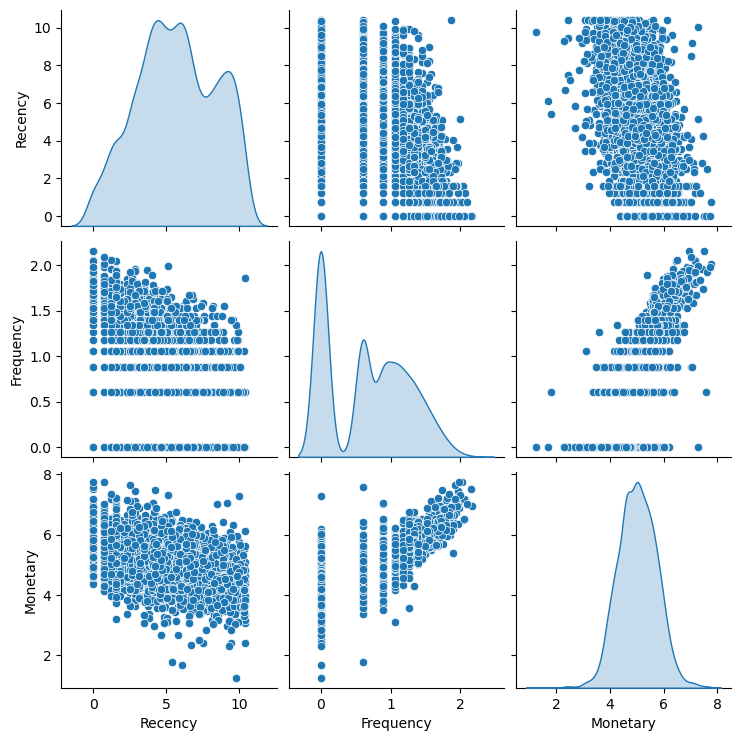

In [21]:
sns.pairplot(rfm_transformed, diag_kind='kde')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_transformed)

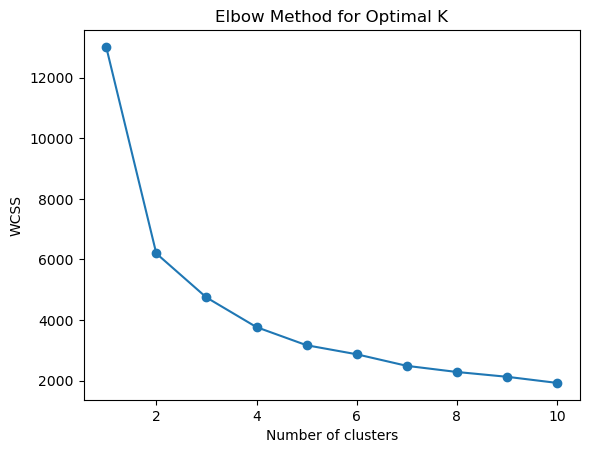

In [24]:
from sklearn.cluster import KMeans

wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')   
plt.show()

In [25]:
optimal_k = 3

k_means = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
k_means.fit(rfm_scaled)

rfm['Cluster'] = k_means.labels_

In [26]:
rfm.head()

Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         326          1  77183.60        0
12347.0           2          7   4310.00        1
12348.0          75          4   1797.24        0
12349.0          19          1   1757.55        0
12350.0         310          1    334.40        2

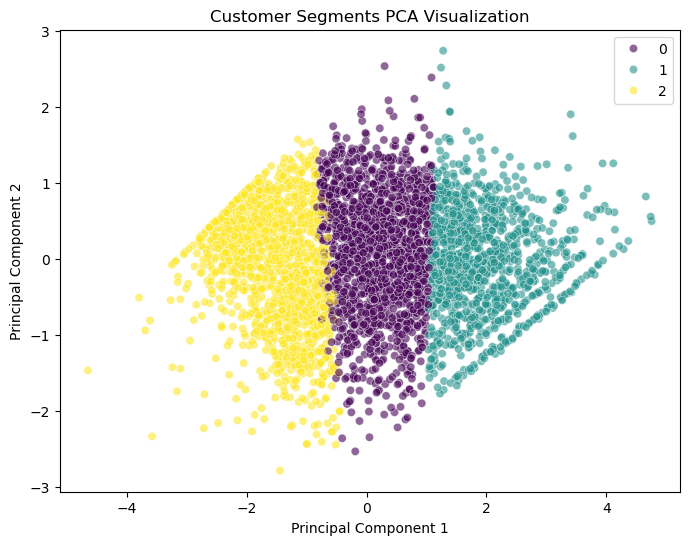

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue= rfm['Cluster'], palette='viridis', alpha=0.6)
plt.title('Customer Segments PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [28]:
cluster_means = rfm[['Cluster', 'Recency', 'Frequency', 'Monetary']].groupby('Cluster', as_index=False).mean()
print("\nCluster Means:")
print(cluster_means)


Cluster Means:
   Cluster     Recency  Frequency     Monetary
0        0   71.461394   2.974890  1036.709336
1        1   17.683746  10.581272  5968.221440
2        2  165.881587   1.125232   312.401278


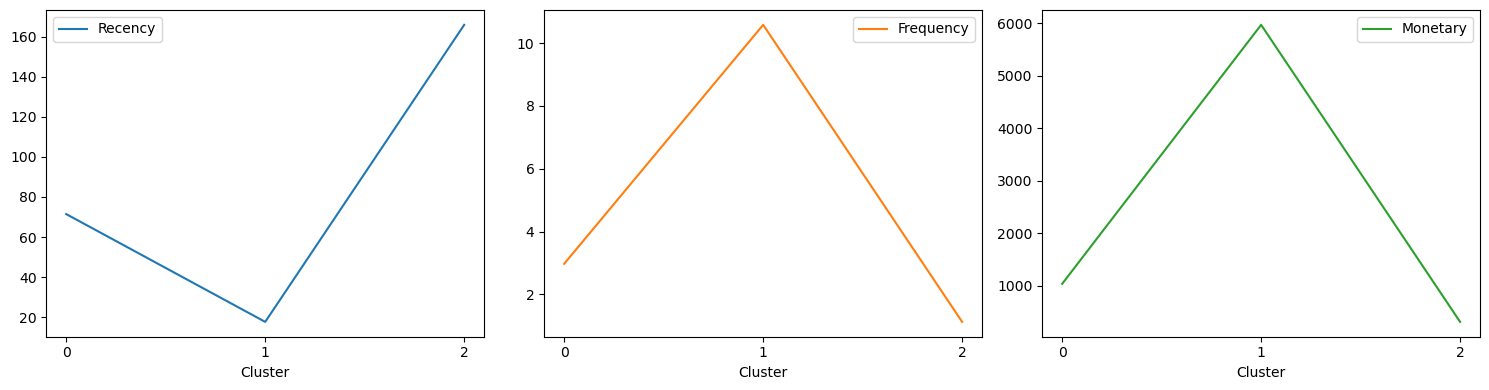

In [29]:
rfm[['Cluster', 'Recency', 'Frequency', 'Monetary']]\
   .groupby('Cluster')\
   .mean()\
   .plot(subplots=True, sharey=False, layout=(1, 3), figsize=(15, 4))

plt.xticks(ticks=[0, 1, 2])
plt.tight_layout()
plt.show()

In [30]:
def suggest_strategy(recency, frequency, monetary):
    if recency == 'Low' and frequency == 'High' and monetary == 'High':
        return "Reward and nurture - exclusive offers, loyalty programs, early access to new products."
    elif recency == 'High' and frequency == 'Low' and monetary == "Low":
        return "Re-engagement and retention - win-back promotions, personalized emails, surveys."
    elif recency == 'Low' and frequency == 'Low' and monetary == 'Low':  # Fixed = to == and fixed quotes
        return "Encourage repeat purchases - welcome emails, incentives for next purchase, product recommendations."
    elif recency == 'High' and frequency == 'Moderate' and monetary == 'Moderate':  # Fixed = to ==
        return "Re-activate and remind - targeted promotions, email campaigns highlighting new arrivals."
    elif recency == 'Low' and frequency == 'Moderate' and monetary == 'Moderate':
        return "Nurture and grow - provide excellent customer service, offer relevant product recommendations."
    elif recency == 'Moderate' and frequency == 'High' and monetary == 'Moderate':  # Fixed -- to == and - to ==
        return "Reward loyalty and encourage more frequent purchases - offer exclusive discounts, early access to sales."
    elif recency == 'Moderate' and frequency == 'Low' and monetary == 'Moderate':  # Fixed = to == and . to ==
        return "Re-engage and offer personalized recommendations - remind them of past purchases, offer discounts on similar items."  # Fixed unterminated string
    elif recency == 'Moderate' and frequency == 'Moderate' and monetary == 'High':  # Fixed = to == and ‚Ä¢= to ==
        return "Encourage larger purchases - offer premium products, cross-selling opportunities, personalized consultations."  # Fixed spelling
    elif recency == 'High' and frequency == 'High' and monetary == 'High':
        return "Re-engage and offer personalized recommendations - remind them of past purchases, offer discounts on similar items."
    elif recency == 'Low' and frequency == 'High' and monetary == 'Moderate':
        return "Reward loyalty and encourage more frequent purchases - offer exclusive discounts, early access to sales."
    else:
        return "Further analysis and tailored strategy required."

strategy = suggest_strategy('Low', 'High', 'High')
print(strategy)

Reward and nurture - exclusive offers, loyalty programs, early access to new products.


In [31]:
print("**"*30)
print("strategy for clusters 0: \n" , suggest_strategy("Modarete", "Low", "Low"))
print("**"*30)
print("strategy for clusters 1: \n" , suggest_strategy( "Low", "High", "high"))
print("**"*30)
print("strategy for clusters 2: \n" , suggest_strategy( "High", "Low", "Low"))

************************************************************
strategy for clusters 0: 
 Further analysis and tailored strategy required.
************************************************************
strategy for clusters 1: 
 Further analysis and tailored strategy required.
************************************************************
strategy for clusters 2: 
 Re-engagement and retention - win-back promotions, personalized emails, surveys.


In [32]:
rfm_melted = pd.melt(rfm.reset_index(),
                     id_vars=['Cluster'],
                     value_vars=['Recency', 'Frequency', 'Monetary'],
                     var_name='Metric',
                     value_name='Value')

rfm_melted.head()

Cluster   Metric  Value
0        0  Recency  326.0
1        1  Recency    2.0
2        0  Recency   75.0
3        0  Recency   19.0
4        2  Recency  310.0

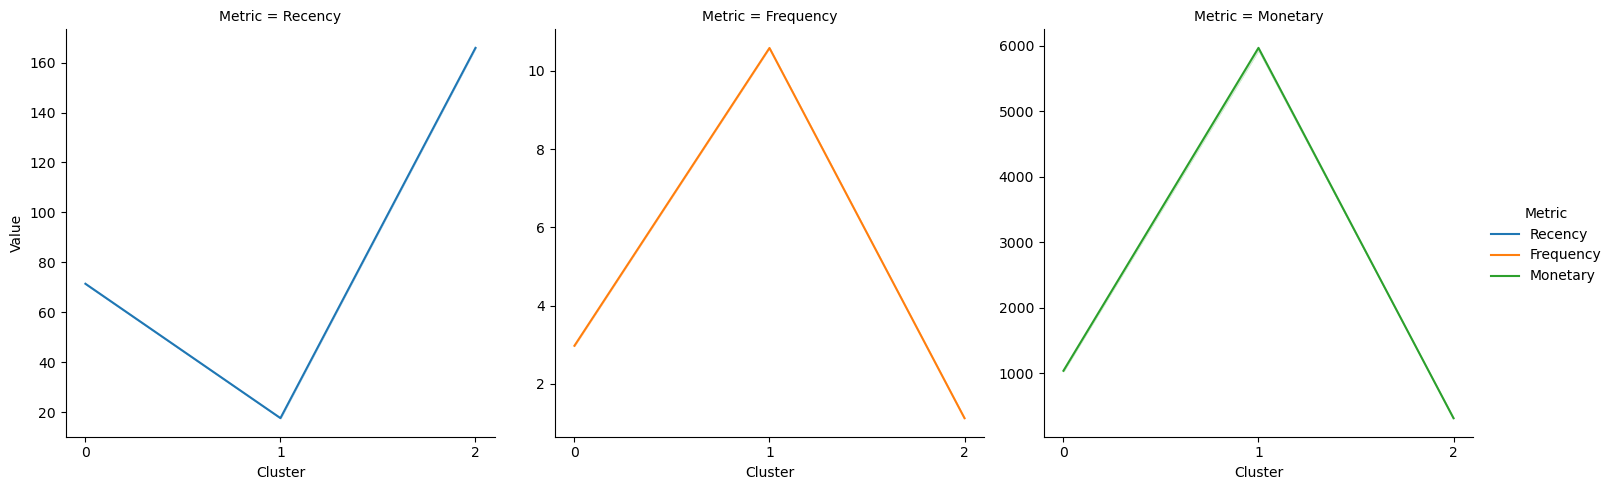

In [33]:
sns.relplot(x='Cluster', y='Value', data=rfm_melted, hue='Metric', kind='line',
            errorbar=('ci', False), col='Metric', facet_kws={'sharey': False})
plt.xticks(ticks=[0, 1, 2])
plt.show()

In [34]:
# Import the TSNE class from sklearn
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)

# Add the t-SNE components to your DataFrame
rfm['TSNE1'] = rfm_tsne[:, 0]
rfm['TSNE2'] = rfm_tsne[:, 1]

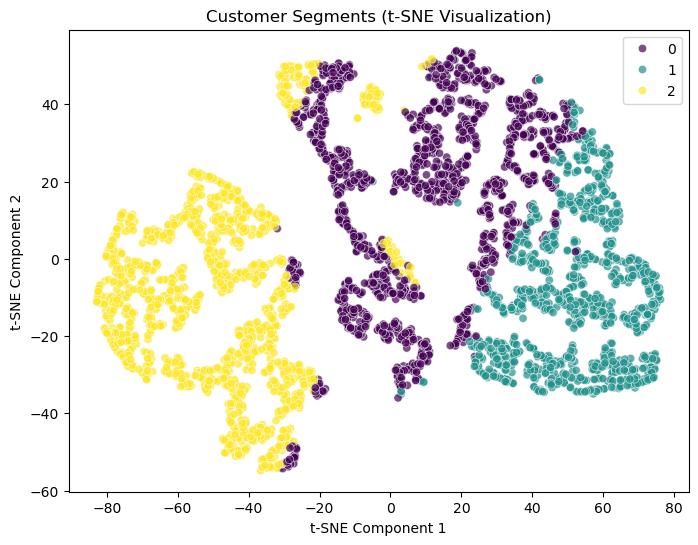

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=rfm, palette='viridis', alpha=0.7)
plt.title('Customer Segments (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

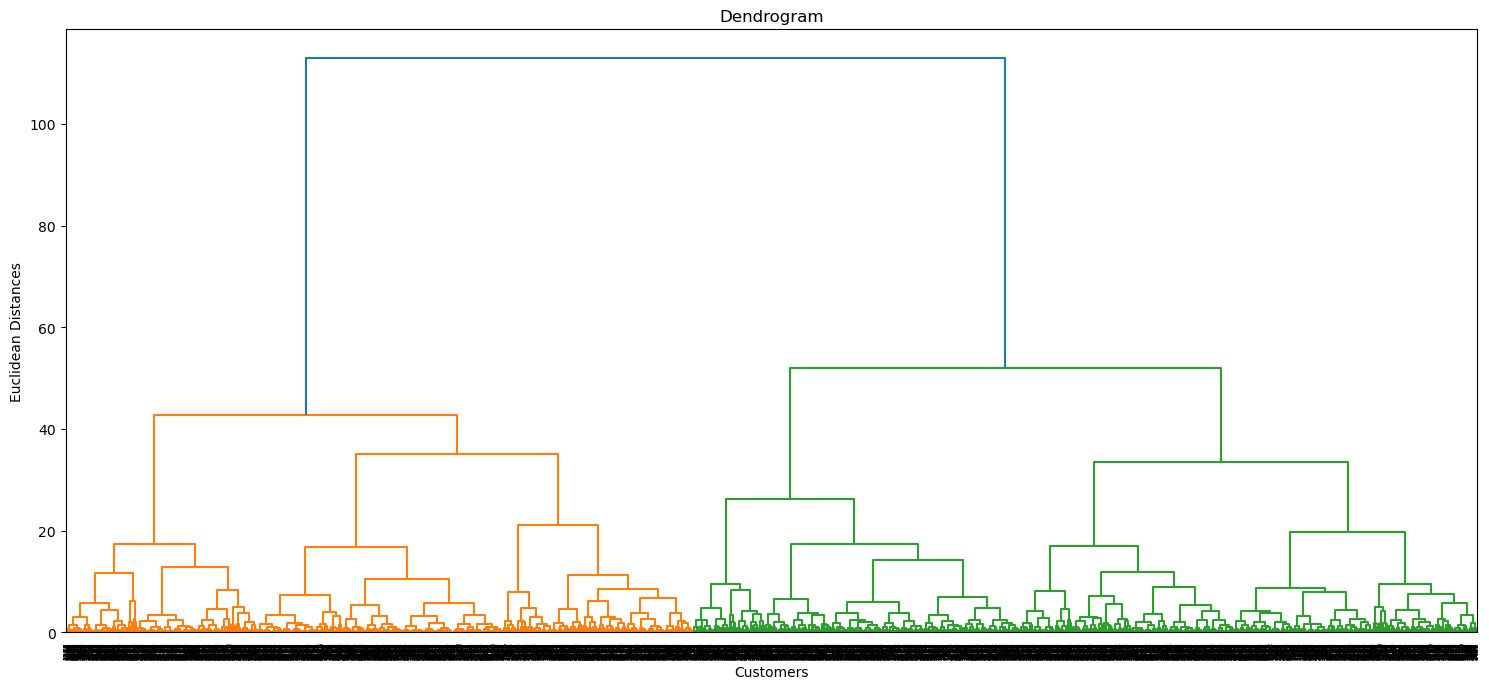

In [36]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering (using Ward's linkage)
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.tight_layout()
plt.show()

In [37]:
# Son i≈ülem tarihini bulma
latest_date = df['InvoiceDate'].max()

In [38]:
# RFM hesaplamalarƒ±
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                  # Frequency
    'TotalPrice': 'sum'                                     # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

In [39]:
# RFM skorlarƒ± hesaplama (y√ºzdelik dilimlere g√∂re)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [40]:
# RFM skoru birle≈ütirme
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [41]:
# RFM segmentasyonu
def segment_customer(score):
    if score in ['555', '554', '454', '455', '355']:
        return '≈ûampiyonlar'
    elif score in ['311', '411', '211']:
        return 'Ka√ßanlar'
    elif score in ['111', '112', '121', '122', '212']:
        return 'Kayƒ±p'
    elif score in ['215', '221', '222', '213', '214', '215', '223', '231', '232', '233', '234', '235']:
        return 'Uyuyanlar'
    elif score in ['312', '313', '314', '315', '321', '322', '323', '324', '325', '331', '332', '333', '334', '335']:
        return 'Potansiyel Sadƒ±klar'
    elif score in ['412', '413', '414', '415', '421', '422', '423', '424', '425', '431', '432', '433', '434', '435']:
        return 'Yeni M√º≈üteriler'
    elif score in ['512', '513', '514', '515', '521', '522', '523', '524', '525', '531', '532', '533', '534', '535']:
        return 'Sadƒ±k M√º≈üteriler'
    else:
        return 'Diƒüer'

In [42]:
rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

print("\nRFM Segmentasyonu:")
print(rfm.head())


RFM Segmentasyonu:
            Recency  Frequency  Monetary  R_Score  F_Score  M_Score RFM_Score  \
CustomerID                                                                      
12346.0         325          1  77183.60        1        1        5       115   
12347.0           1        182   4310.00        5        5        5       555   
12348.0          74         31   1797.24        2        3        4       234   
12349.0          18         73   1757.55        4        4        4       444   
12350.0         309         17    334.40        1        2        2       122   

                Segment  
CustomerID               
12346.0           Diƒüer  
12347.0     ≈ûampiyonlar  
12348.0       Uyuyanlar  
12349.0           Diƒüer  
12350.0           Kayƒ±p  


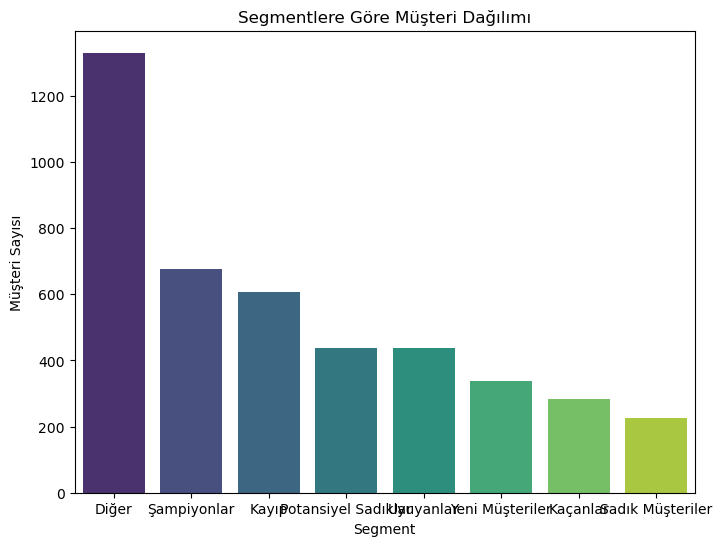

In [43]:
segment_counts = rfm['Segment'].value_counts()

# Bar grafiƒüi √ßizimi
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('M√º≈üteri Sayƒ±sƒ±')
plt.title('Segmentlere G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ±')
plt.show()

# Kmeans

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
# RFM deƒüerlerini √∂l√ßeklendirme
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [47]:
rfm_df=df.copy()

In [48]:
from sklearn.neighbors import BallTree  # BallTree, veri noktalarƒ± arasƒ±ndaki uzaklƒ±k sorgularƒ±nƒ± hƒ±zlƒ± bir ≈üekilde ger√ßekle≈ütirmek i√ßin kullanƒ±lan bir veri yapƒ±sƒ±dƒ±r.
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [49]:
hopkins(rfm_scaled, rfm_scaled.shape[0] )

np.float64(0.009324453707889244)

In [50]:
# Optimum k√ºme sayƒ±sƒ±nƒ± bulma (Elbow Method ve Silhouette Analysis)
sse = []
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

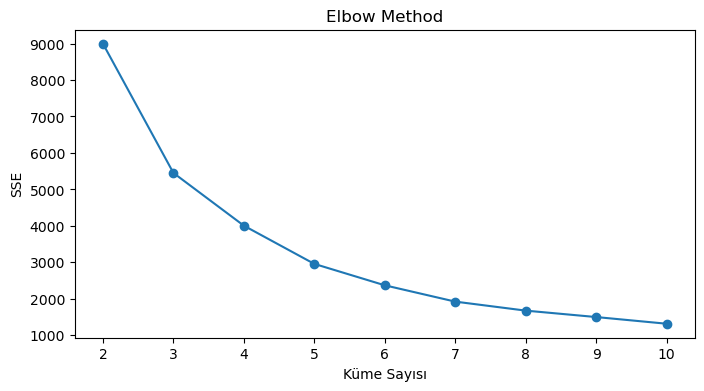

In [51]:
# Elbow Method grafiƒüi
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('K√ºme Sayƒ±sƒ±')
plt.ylabel('SSE')
plt.show()

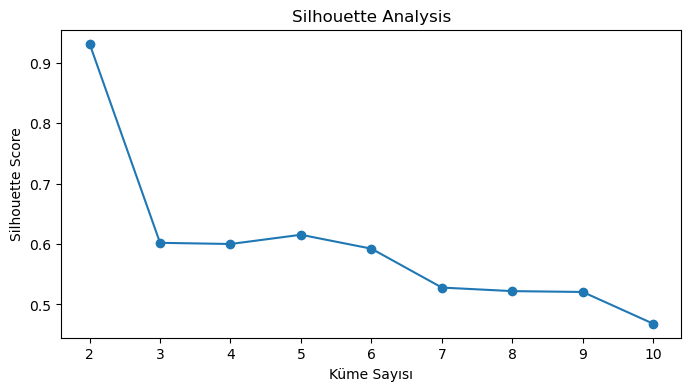

In [52]:
# Silhouette Analysis grafiƒüi
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('K√ºme Sayƒ±sƒ±')
plt.ylabel('Silhouette Score')
plt.show()

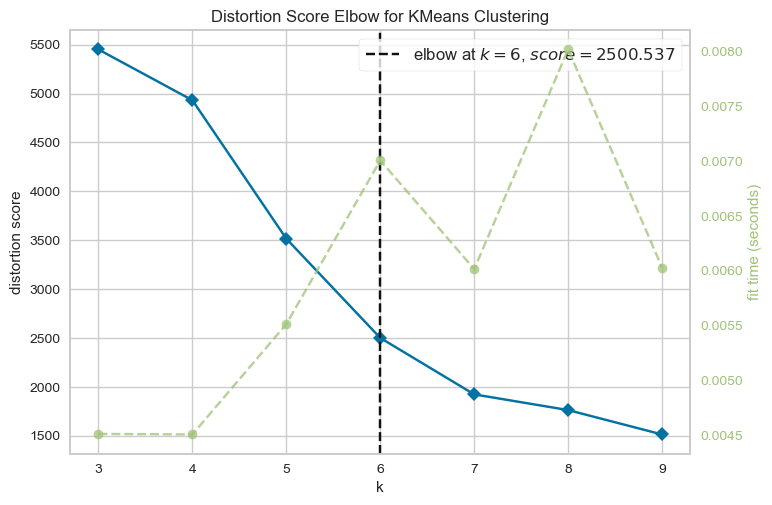

In [53]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(3,10))

visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show(); 

## distortion=inertia

In [54]:
range_n_clusters = range(3,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=3, the silhouette score is 0.6019775931686978
For n_clusters=4, the silhouette score is 0.3588023011776161
For n_clusters=5, the silhouette score is 0.3599790938322134
For n_clusters=6, the silhouette score is 0.5133606176751524
For n_clusters=7, the silhouette score is 0.5225734448733069
For n_clusters=8, the silhouette score is 0.5244388648874353
For n_clusters=9, the silhouette score is 0.504623773366762


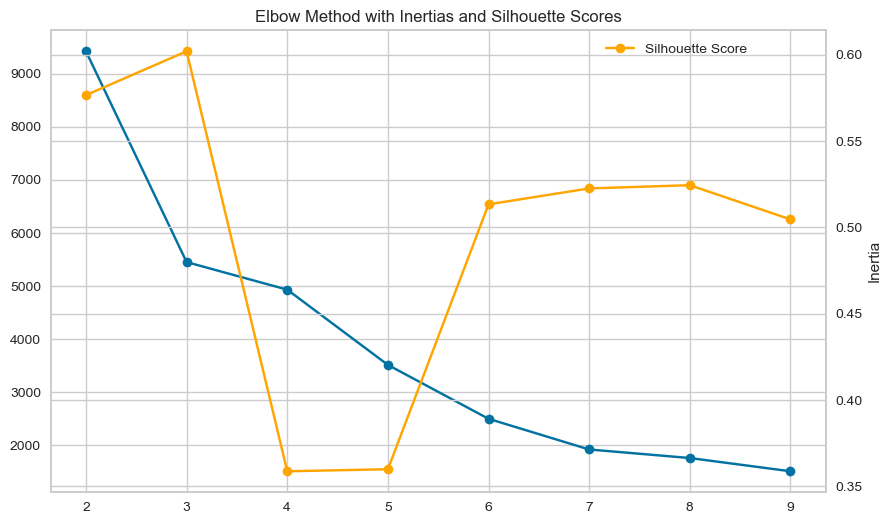

In [55]:
# Elbow + Silhoutee skorunu bir arada g√∂steren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(rfm_scaled)
    silhouette = silhouette_score(rfm_scaled, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
    
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

In [56]:
ssd = []  #inertia mesafelerin karelerinin toplamƒ±

K = range(3,10)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(rfm_scaled)
    ssd.append(model.inertia_)

In [57]:
ssd

[5451.751192923712,
 4932.430400350042,
 3515.554959233251,
 2500.5368110184163,
 1922.9077664562533,
 1762.1876520479243,
 1512.6441504935933]

In [58]:
# Kullanƒ±cƒ±dan k√ºme sayƒ±sƒ±nƒ± al
n_clusters = int(input("L√ºtfen optimum k√ºme sayƒ±sƒ±nƒ± girin (√ñrn: 3): "))

L√ºtfen optimum k√ºme sayƒ±sƒ±nƒ± girin (√ñrn: 3):  3


In [86]:
print(len(rfm_scaled))  # 4338
print(len(rfm_df))      # 397884

4338
397884


In [88]:
print(rfm_scaled.shape)
print(rfm_df.shape)

(4338, 3)
(397884, 9)


In [94]:
# K-Means modelini olu≈üturma ve eƒüitme
kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=42)

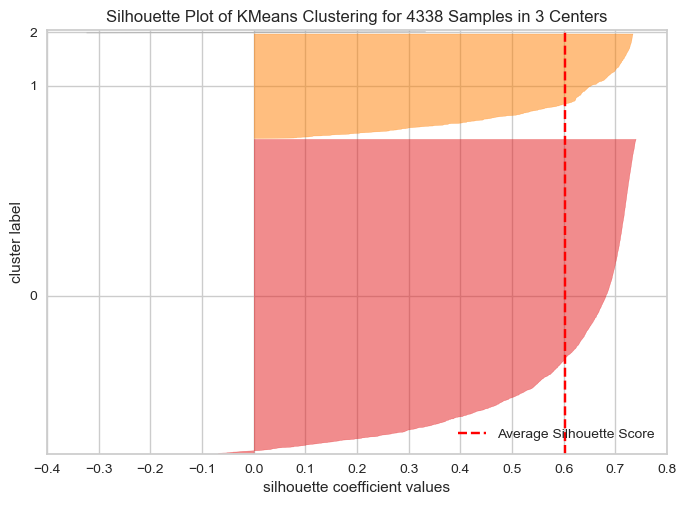

In [96]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(rfm_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [98]:
final_model = KMeans(n_clusters = 3, random_state = 42)
final_model.fit_predict(rfm_scaled)

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

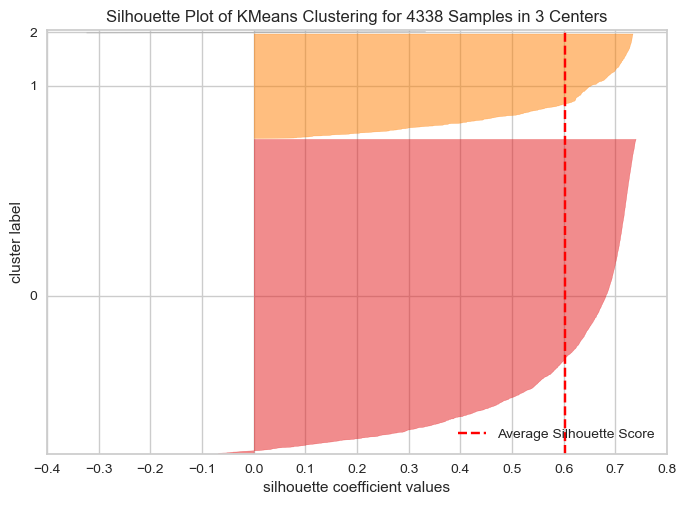

In [99]:
from yellowbrick.cluster import SilhouetteVisualizer

final_model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(final_model)

visualizer.fit(rfm_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [100]:
# Convert the NumPy array to a pandas DataFrame first, then sample
import pandas as pd

# Assuming rfm_scaled is your NumPy array
rfm_scaled_df = pd.DataFrame(rfm_scaled)

# Now you can use the sample method
rfm_scaled_df.sample(10)

# If you had column names in your original data, you can add them:
# rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['col1', 'col2', ...])

0         1         2
1996  0.804615 -0.186750 -0.130551
2215  0.034635 -0.274178 -0.126953
2787 -0.835342  0.578249  0.194168
3144 -0.615348 -0.182378 -0.088645
3024 -0.585349  0.246021 -0.050155
3626 -0.675346  0.171707  0.052697
848   1.404599 -0.300407 -0.178014
1061  1.584594 -0.326635 -0.214329
2084  0.274629 -0.178007 -0.112364
426  -0.685346 -0.042493 -0.186222

In [101]:
new_data = [
    [1160, 876, 2787],
    [2916, 2711, 1963],
    [639, 261, 183]
]

new_data_scaled = scaler.transform(new_data)
prediction = final_model.predict(new_data_scaled)
print(f"M√º≈üteri k√ºmeleri: {prediction}")

M√º≈üteri k√ºmeleri: [1 1 1]


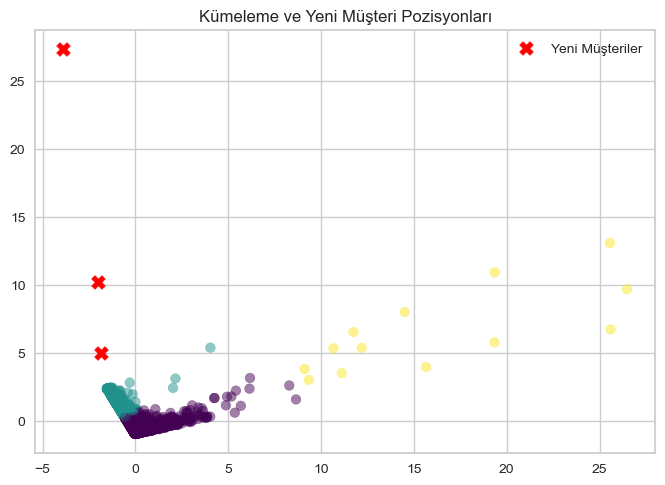

In [102]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Varsayalƒ±m train_data_scaled model eƒüitimi i√ßin kullanƒ±ldƒ±
pca = PCA(n_components=2)
train_pca = pca.fit_transform(rfm_scaled)
new_pca = pca.transform(new_data_scaled)

plt.scatter(train_pca[:, 0], train_pca[:, 1], c=final_model.predict(rfm_scaled), cmap='viridis', alpha=0.5)
plt.scatter(new_pca[:, 0], new_pca[:, 1], c='red', label='Yeni M√º≈üteriler', marker='X', s=100)
plt.legend()
plt.title("K√ºmeleme ve Yeni M√º≈üteri Pozisyonlarƒ±")
plt.show()

# Cohort Analysis

**Cohort Analizi (Cohort Analysis)**

Cohort analizi, belirli zaman dilimlerinde veya davranƒ±≈üsal √∂zelliklere g√∂re gruplandƒ±rƒ±lmƒ±≈ü kullanƒ±cƒ±larƒ±n davranƒ±≈ülarƒ±nƒ± incelemek i√ßin kullanƒ±lan bir analiz y√∂ntemidir. √ñzellikle m√º≈üteri tutma oranlarƒ±nƒ± ve kullanƒ±cƒ±larƒ±n zaman i√ßindeki davranƒ±≈ülarƒ±nƒ± analiz etmek i√ßin faydalƒ±dƒ±r.

**Cohort Nedir?**
Cohort, belirli bir ortak √∂zelliƒüi payla≈üan bir grup insan veya m√º≈üteri demektir. √ñrneƒüin:
- **Kaydolma tarihi**: Belirli bir ay i√ßinde kaydolmu≈ü kullanƒ±cƒ±lar.
- **ƒ∞lk alƒ±≈üveri≈ü tarihi**: Belirli bir d√∂nemde ilk alƒ±≈üveri≈ü yapan m√º≈üteriler.

**Cohort Analizinin Ama√ßlarƒ±:**
1. M√º≈üteri tutma oranlarƒ±nƒ± analiz etmek.
2. M√º≈üteri davranƒ±≈ülarƒ±ndaki eƒüilimleri anlamak.
3. Pazarlama stratejilerinin etkinliƒüini √∂l√ßmek.
4. Zaman i√ßinde m√º≈üteri gruplarƒ±nƒ±n nasƒ±l deƒüi≈ütiƒüini g√∂rmek.

**Nasƒ±l Yapƒ±lƒ±r?**
Cohort Analysis genellikle m√º≈üterilerin ilk satƒ±n alma veya kayƒ±t tarihine dayalƒ± olarak yapƒ±lƒ±r. Temel adƒ±mlar ≈üunlardƒ±r:

1. **Cohort Belirleme**: Analize dahil edilecek m√º≈üteri gruplarƒ±nƒ± tanƒ±mlayƒ±n. √ñrneƒüin, m√º≈üterileri kayƒ±t tarihlerine g√∂re aylƒ±k olarak gruplara ayƒ±rabilirsiniz.

2. **M√º≈üteri Davranƒ±≈ülarƒ±nƒ±n ƒ∞zlenmesi**: Belirlenen her bir cohort i√ßin, m√º≈üterilerin zaman i√ßindeki davranƒ±≈ülarƒ±nƒ± (√∂rneƒüin, satƒ±n alma miktarƒ±, tekrar satƒ±n alma oranƒ±) izleyin.

3. **Geli≈ümelerin Analizi**: Her bir cohort i√ßin, zamanla deƒüi≈üen davranƒ±≈ülarƒ± ve performansƒ± analiz edin. Bu, √∂zellikle cohort'un ilk etkile≈üimden sonraki davranƒ±≈ülarƒ±na ve m√º≈üteri ya≈üam d√∂ng√ºs√ºne odaklanƒ±r.

4. **Segmentasyon ve Kar≈üƒ±la≈ütƒ±rma**: Elde edilen verileri analiz edin ve farklƒ± cohort gruplarƒ±nƒ± kar≈üƒ±la≈ütƒ±rƒ±n. Bu, belirli pazarlama stratejilerinin veya i≈ületme deƒüi≈üikliklerinin cohort gruplarƒ±nƒ±n davranƒ±≈ülarƒ±na nasƒ±l etki ettiƒüini anlamak i√ßin √∂nemlidir.

**Cohort Analizinin Kullanƒ±m Alanlarƒ±:**
- **E-Ticaret:** M√º≈üteri sadakatini ve satƒ±n alma eƒüilimlerini √∂l√ßmek.
- **SaaS ≈ûirketleri:** Abonelik iptali (churn) oranƒ±nƒ± analiz etmek.
- **Mobil Uygulamalar:** Kullanƒ±cƒ±larƒ±n aktif kalma oranlarƒ±nƒ± g√∂rmek.
  
**Cohort Analizinin Faydalarƒ±**

- **M√º≈üteri Davranƒ±≈ülarƒ±nƒ±n Anla≈üƒ±lmasƒ±**: Hangi m√º≈üteri gruplarƒ±nƒ±n i≈ületme i√ßin en deƒüerli olduƒüunu ve nasƒ±l davrandƒ±ƒüƒ±nƒ± anlamak i√ßin deƒüerli bir yol saƒülar.

- **Pazarlama Stratejilerinin Optimizasyonu**: Cohort Analysis, pazarlama stratejilerinin etkilerini deƒüerlendirmek ve optimize etmek i√ßin kullanƒ±labilir.

- **Sadakat ve M√º≈üteri ƒ∞li≈ükileri Y√∂netimi**: M√º≈üteri sadakati ve ili≈ükilerinin zaman i√ßinde nasƒ±l deƒüi≈ütiƒüini anlamak i√ßin kullanƒ±labilir.

**√ñrnek Analiz Sorularƒ±:**
- Yeni m√º≈üteriler ilk alƒ±≈üveri≈ülerinden sonra ne kadar s√ºre baƒülƒ± kalƒ±yor?
- Pazarlama kampanyasƒ± belirli bir d√∂nemdeki m√º≈üterileri nasƒ±l etkiledi?
- M√º≈üteri tutma oranƒ± zamanla artƒ±yor mu, azalƒ±yor mu?

---

**RFM Analizi ve Cohort Analizi Arasƒ±ndaki Farklar:**
| **RFM Analizi**                         | **Cohort Analizi**                     |
|------------------------------------------|-----------------------------------------|
| M√º≈üterileri bireysel skorlarla deƒüerlendirir. | M√º≈üterileri gruplar halinde inceler.    |
| Daha √ßok m√º≈üteri segmentasyonu i√ßin kullanƒ±lƒ±r. | M√º≈üteri davranƒ±≈ülarƒ±nƒ± analiz etmek i√ßin uygundur. |
| Hedefi, m√º≈üterinin g√ºncel ve ge√ßmi≈ü davranƒ±≈ülarƒ±nƒ± deƒüerlendirmektir. | Zaman i√ßindeki eƒüilimleri analiz etmeye odaklanƒ±r. |

In [105]:
# ƒ∞lk satƒ±n alma tarihini bulma
df['First_Purchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')

In [106]:
# Cohort'u belirleme (ay bazƒ±nda)
df['First_Purchase_Month'] = df['First_Purchase'].dt.to_period('M')
df['Invoice_Month'] = df['InvoiceDate'].dt.to_period('M')

In [107]:
# Cohort boyutunu hesaplama
df['Cohort_Size'] = df.groupby('First_Purchase_Month')['CustomerID'].transform('nunique')

In [108]:
# Cohort tablosunu olu≈üturma
cohort_group = df.groupby(['First_Purchase_Month', 'Invoice_Month']).agg(n_customers=('CustomerID', 'nunique')).reset_index()
cohort_group['Period_Number'] = (cohort_group['Invoice_Month'] - cohort_group['First_Purchase_Month']).apply(lambda x: x.n)
cohort_pivot = cohort_group.pivot_table(index='First_Purchase_Month', columns='Period_Number', values='n_customers')

In [109]:
# M√º≈üteri tutma oranƒ±nƒ± hesaplama
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

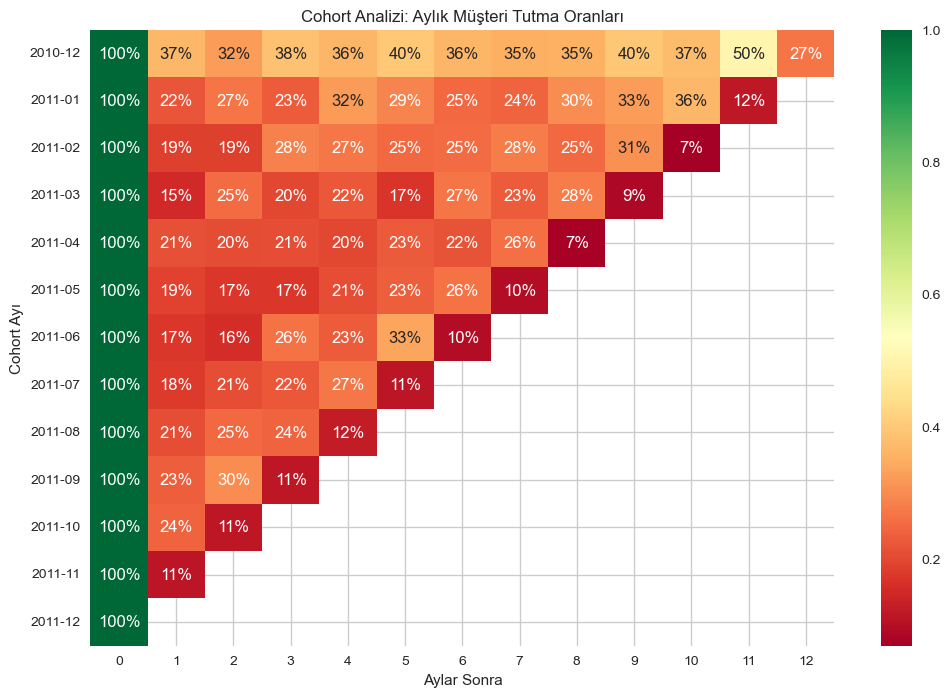

In [110]:
# M√º≈üteri tutma oranƒ±nƒ± g√∂rselle≈ütirme
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='RdYlGn')
plt.title('Cohort Analizi: Aylƒ±k M√º≈üteri Tutma Oranlarƒ±')
plt.xlabel('Aylar Sonra')
plt.ylabel('Cohort Ayƒ±')
plt.show()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# 1. Tarih d√∂n√º≈ü√ºm√ºn√º garanti altƒ±na al
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [113]:
# 2. ƒ∞lk satƒ±n alma tarihi
df['First_Purchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')

In [114]:
# 3. Ay bazƒ±nda cohort belirleme
df['First_Purchase_Month'] = df['First_Purchase'].dt.to_period('M')
df['Invoice_Month'] = df['InvoiceDate'].dt.to_period('M')

In [115]:
# 4. Cohort tablosunu olu≈üturma
cohort_group = df.groupby(['First_Purchase_Month', 'Invoice_Month']) \
    .agg(n_customers=('CustomerID', 'nunique')) \
    .reset_index()

In [116]:
# 5. Ka√ßƒ±ncƒ± ay (d√∂nem farkƒ±)
cohort_group['Period_Number'] = (cohort_group['Invoice_Month'] - cohort_group['First_Purchase_Month']).apply(lambda x: x.n)

In [117]:
# 6. Pivot tablo
cohort_pivot = cohort_group.pivot_table(index='First_Purchase_Month', 
                                        columns='Period_Number', 
                                        values='n_customers')

In [118]:
# 7. Retention oranƒ±
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

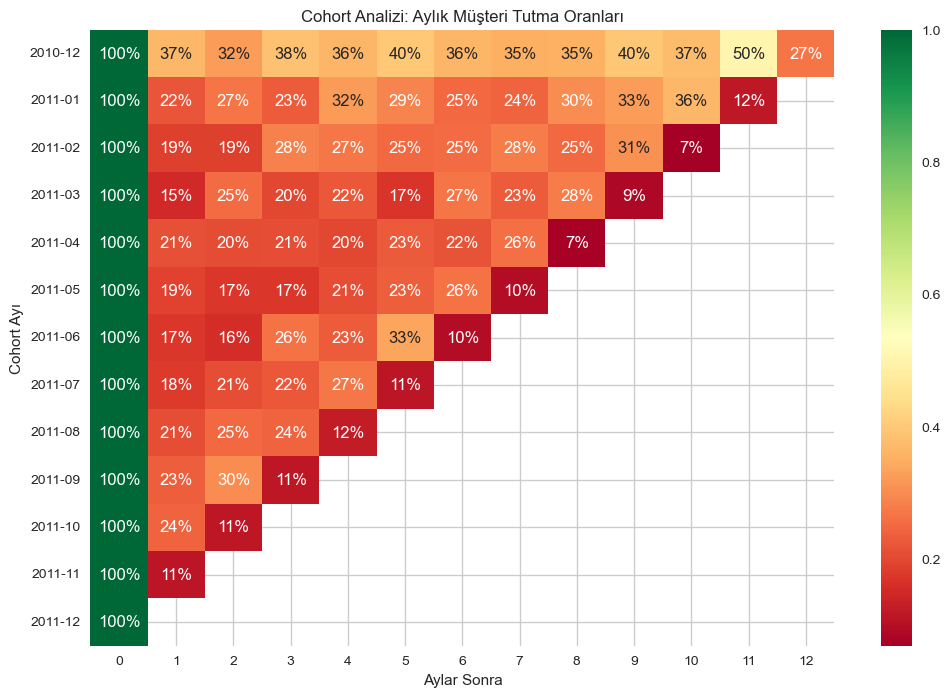

In [119]:
# 8. Heatmap g√∂rselle≈ütirme
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='RdYlGn', mask=retention_matrix.isnull())
plt.title('Cohort Analizi: Aylƒ±k M√º≈üteri Tutma Oranlarƒ±')
plt.xlabel('Aylar Sonra')
plt.ylabel('Cohort Ayƒ±')
plt.show()

G√∂rselin Anlamƒ± ve Yorumu:
üîπ Cohort Ayƒ± (Sol Y Ekseni):
‚Ä¢	Her satƒ±r, bir m√º≈üteri grubunu (cohort) temsil eder. √ñrneƒüin, 2010-12 cohort'u, ilk kez Aralƒ±k 2010'da alƒ±≈üveri≈ü yapan m√º≈üterileri kapsar.

üîπ Aylar Sonra (Alt X Ekseni):
‚Ä¢	Bu eksen, m√º≈üterilerin ilk alƒ±≈üveri≈ülerinden ka√ß ay sonra tekrar alƒ±≈üveri≈ü yaptƒ±ƒüƒ±nƒ± g√∂sterir.
√ñrneƒüin:
o	0. ay = ƒ∞lk alƒ±≈üveri≈ü ayƒ±
o	
1.	ay = Ertesi ay
o	...
o	
12.	ay = Bir yƒ±l sonra



üîπ H√ºcre Deƒüerleri (%):
‚Ä¢	Her h√ºcredeki oran, o cohort'taki m√º≈üterilerin belirli bir ay sonra h√¢l√¢ aktif (alƒ±≈üveri≈ü yapan) olup olmadƒ±ƒüƒ±nƒ± g√∂sterir.

√ñrneƒüin:
o	2010-12 cohort'u, 1 ay sonra %37'sini tutabilmi≈ü.
o	Aynƒ± grup 12 ay sonra h√¢l√¢ %27 aktifmi≈ü.

üîπ Renk Skalasƒ±:

‚Ä¢	Ye≈üil: Y√ºksek m√º≈üteri tutma oranƒ±
‚Ä¢	Kƒ±rmƒ±zƒ±: D√º≈ü√ºk tutma oranƒ±
	
1.	ay (ilk alƒ±≈üveri≈ü ayƒ±) her zaman %100‚Äôd√ºr.

‚Ä¢	Hangi d√∂nemlerde gelen m√º≈üteriler daha sadƒ±k?
√ñrneƒüin, 2010-12 cohort'undaki m√º≈üteriler diƒüer aylara g√∂re daha iyi tutma oranƒ±na sahip.

‚Ä¢	M√º≈üteri sadakati genel olarak nasƒ±l seyrediyor?
Genellikle ilk aylarda ciddi d√º≈ü√º≈ü g√∂zlemleniyor. √ñrn: 1. ayda %20-30'lara iniyor.


‚Ä¢	Pazarlama kampanyalarƒ±nƒ±n etkisi √∂l√ß√ºlebilir.

Belirli aylarda (√∂rneƒüin 2011-06'da 5. ayda %33'e sƒ±√ßrama) bir kampanya olabilir.


2010-12 Cohort Detaylƒ± Analizi

‚Ä¢	Bu grup, en y√ºksek sadakat oranƒ±na sahip.
‚Ä¢	12 ay boyunca m√º≈üteri tutma oranlarƒ± g√∂receli olarak daha y√ºksek seyrediyor.


Ay (Sonrasƒ±)	Tutulan M√º≈üteri Oranƒ±	A√ßƒ±klama

0. ay	%100	ƒ∞lk alƒ±≈üveri≈ülerini yapan t√ºm m√º≈üteriler.
1. ay	%37	M√º≈üterilerin %37'si sonraki ay tekrar alƒ±≈üveri≈ü yaptƒ±.
2. ay	%32	%32'si 2. ayda aktif kaldƒ±.
3. ay	%38	ƒ∞lgin√ß bir ≈üekilde artƒ±≈ü g√∂zlenmi≈ü. Muhtemelen kampanya etkisi olabilir.
4. ay	%36	ƒ∞stikrar devam ediyor.
5. ay	%40	Yine bir artƒ±≈ü; sadƒ±k m√º≈üteri kitlesi olu≈ümu≈ü olabilir.
6. ay	%36	D√º≈ü√º≈üe raƒümen h√¢l√¢ y√ºksek.
7. ay	%35	K√º√ß√ºk bir azalma.
8. ay	%40	Yeniden y√ºkselme‚Äîbelki de √∂zel bir promosyon d√∂nemi.
9. ay	%37	Olduk√ßa istikrarlƒ± bir sadakat eƒürisi.
10. ay	%50	En y√ºksek oranlardan biri. Kampanya, sezon, vb. etkili olabilir.
11. ay	-	Veri yok veya analiz dƒ±≈üƒ± bƒ±rakƒ±lmƒ±≈ü olabilir.
12. ay	%27	1 yƒ±l sonra m√º≈üterilerin d√∂rtte biri h√¢l√¢ aktif. Bu, e-ticaret i√ßin g√º√ßl√º bir orandƒ±r.


‚Ä¢	Sadakat eƒürisi √ßok saƒülam:
Genelde bir√ßok cohort ilk 2‚Äì3 ayda %10'un altƒ±na d√º≈üerken, bu grup 12. ayda bile %27 ile devam ediyor.

‚Ä¢	Dalgalanmalar dikkat √ßekici: 
3., 5., 8. ve 10. aylarda k√º√ß√ºk artƒ±≈ülar var ‚Üí muhtemelen kampanya, sezon veya belirli stratejik aksiyonlarla ili≈ükilidir.

‚Ä¢	M√º≈üteri kalitesi y√ºksek olabilir: 
Belki bu d√∂nemde gelen m√º≈üteriler daha b√ºy√ºk kurumsal m√º≈üterilerdi, belki reklam stratejisi daha isabetliydi.


Bu Cohort‚Äôa D√∂n√ºk Eylem √ñnerileri:

‚Ä¢	Bu cohort'un ilk aylarƒ±ndaki pazarlama stratejileri incelenmeli ‚Üí aynƒ± taktikler diƒüer cohort'lara da uygulanabilir.

‚Ä¢	Sadƒ±k m√º≈üteri profili √ßƒ±karƒ±lmalƒ±: Bu m√º≈üteriler hangi √ºr√ºnleri aldƒ±, nereden geldi (kanal), ortalama sepet tutarƒ± neydi?

‚Ä¢	
10.	aydaki %50 artƒ±≈üƒ±n nedeni ara≈ütƒ±rƒ±lmalƒ±: Sezonsal bir artƒ±≈ü mƒ± yoksa kampanya mƒ±?


In [127]:
retention_matrix.idxmax(axis=1)
## 	‚Ä¢	Daha fazla analiz i√ßin monetary veya frequency boyutlarƒ± da eklendi.
##	‚Ä¢	RFM analizi ile birlikte kullanƒ±labilir.
##	‚Ä¢	ƒ∞lk ay (%100) dƒ±≈üƒ±nda en iyi tutunma hangi ayda, hangi cohort‚Äôta olmu≈ü bunu analiz etmek i√ßin:

First_Purchase_Month
2010-12    0
2011-01    0
2011-02    0
2011-03    0
2011-04    0
2011-05    0
2011-06    0
2011-07    0
2011-08    0
2011-09    0
2011-10    0
2011-11    0
2011-12    0
Freq: M, dtype: int64

G√∂r√ºn√ºyor ki t√ºm aylar i√ßin "0" deƒüeri alƒ±nmƒ±≈ü, yani her cohort i√ßin "ilk ay dƒ±≈üƒ±nda" en y√ºksek m√º≈üteri tutma oranƒ± 0. ayda √ßƒ±kƒ±yor gibi yorumlanmƒ±≈ü.

Bu da analizinizde k√º√ß√ºk bir hata olabileceƒüini g√∂steriyor.

0. ayƒ± da dahil ederek maksimum deƒüeri veriyor. Ama 0. ay her zaman %100 olduƒüundan bu, anlamlƒ± bir analiz olmaz.


In [129]:
# 0. ayƒ± dƒ±≈üarƒ±da bƒ±rak
retention_matrix_wo_month_0 = retention_matrix.iloc[:, 1:]

# Her cohort i√ßin en y√ºksek tutunma hangi ayda olmu≈ü (ilk ay hari√ß)
best_months = retention_matrix_wo_month_0.idxmax(axis=1)
print(best_months)


First_Purchase_Month
2010-12    11.0
2011-01    10.0
2011-02     9.0
2011-03     8.0
2011-04     7.0
2011-05     6.0
2011-06     5.0
2011-07     4.0
2011-08     2.0
2011-09     2.0
2011-10     1.0
2011-11     1.0
2011-12     NaN
Freq: M, dtype: float64


In [130]:
# En y√ºksek oranƒ± ve ayƒ± birlikte g√∂ster
max_values = retention_matrix_wo_month_0.max(axis=1)
max_months = retention_matrix_wo_month_0.idxmax(axis=1)

result_df = pd.DataFrame({
    'Best Month': max_months,
    'Retention Rate': max_values.round(2)
})

print(result_df)


                      Best Month  Retention Rate
First_Purchase_Month                            
2010-12                     11.0            0.50
2011-01                     10.0            0.36
2011-02                      9.0            0.31
2011-03                      8.0            0.28
2011-04                      7.0            0.26
2011-05                      6.0            0.26
2011-06                      5.0            0.33
2011-07                      4.0            0.27
2011-08                      2.0            0.25
2011-09                      2.0            0.30
2011-10                      1.0            0.24
2011-11                      1.0            0.11
2011-12                      NaN             NaN


üß† Yorumlar:

‚úÖ G√º√ßl√º Cohort‚Äôlar:

2010-12 cohort‚Äôu 11. ayda bile %50 m√º≈üteri tutmu≈ü. Bu olaƒüan√ºst√º bir sadakat g√∂stergesidir.


2011-06 da dikkat √ßekici: 5. ayda %33 oranla zirve yapmƒ±≈ü.



2011-09 da 2. ayda %30 ile olduk√ßa iyi performans g√∂stermi≈ü.

‚è≥ Tutunmanƒ±n Ge√ß Zirve Yaptƒ±ƒüƒ± Cohort‚Äôlar:

2010-12, 2011-01, 2011-02‚Ä¶ gibi cohort‚Äôlar zirveyi √ßok ge√ß (8‚Äì11. aylar arasƒ±nda) yapmƒ±≈ü.

Bu, m√º≈üterilerin ge√ß geri d√∂nd√ºƒü√ºn√º, belki de tekrarlƒ± kampanyalarƒ±n etkili olduƒüunu g√∂sterir.


üö® Zayƒ±f Cohort‚Äôlar:

2011-11 ve 2011-12 olduk√ßa zayƒ±f. Bu d√∂nemlerde gelen m√º≈üteriler ya kalitesizdi ya da ortam (sezon, kampanya, √ºr√ºn, stok vs.) uygun deƒüildi.

1. üéØ En G√º√ßl√º Cohort: 2010-12

Tutunma Oranƒ±: %50 (en y√ºksek)


Strateji: Bu d√∂nemde uygulanan kampanyalar, √ºr√ºn gamƒ± veya pazarlama stratejileri ba≈üarƒ±lƒ± olmu≈ü olabilir.
    

üìå Bu d√∂nemin kampanya ve m√º≈üteri deneyimlerini analiz et, yeniden uygulanabilir mi?


üì¶ √úr√ºn portf√∂y√º, fiyat politikasƒ± veya m√º≈üteri hizmetleri √∂zelinde retrospektif yapƒ±labilir.




2. üïë Tutunma Ayƒ± ile ƒ∞lk Alƒ±≈üveri≈ü Arasƒ± Ortalama: ~9-10 Ay

M√º≈üteriler en fazla yakla≈üƒ±k 9 ay sonra tekrar satƒ±n alƒ±m yapmƒ±≈ü.
    

Strateji:


üéÅ Sadakat programlarƒ± veya hatƒ±rlatma kampanyalarƒ± bu zaman diliminde yoƒüunla≈ütƒ±rƒ±lmalƒ±.
    

üìÖ 3., 6., 9. aylarda e-posta dizileri ve promosyonlar planlanabilir.
    

3. üßä Zayƒ±f Cohortlar: 2011-11 & 2011-12

Tutunma oranƒ± √ßok d√º≈ü√ºk (%11 ve eksik)


Strateji:


‚ùå Yƒ±l sonu d√∂neminde m√º≈üteriyi elde tutma ba≈üarƒ±sƒ±z ‚Üí sezon dƒ±≈üƒ± olabilir mi?


üìâ Kargo problemleri, stok sorunlarƒ± veya d√º≈ü√ºk √ºr√ºn kalitesi gibi operasyonel sƒ±kƒ±ntƒ±lar olabilir.
    

üîç 2011 Q4 i√ßin memnuniyet verisi veya iade oranƒ± analiz edilmeli.


4. üîÅ ƒ∞lk Alƒ±≈üveri≈üten Sonra 2. Alƒ±≈üveri≈üe Y√∂nlendirme Zayƒ±f

veya 3. aydan sonra √ßoƒüu cohortun retention oranƒ± d√º≈ü√ºyor.


Strateji:


üöÄ ‚Äúƒ∞kinci alƒ±≈üveri≈ü indirimi‚Äù kampanyasƒ± planlanabilir (%20 indirim, √ºcretsiz kargo).


üîÑ Otomatik e-posta hatƒ±rlatmalarƒ±: ‚ÄúSizi tekrar g√∂rmek istiyoruz!‚Äù




5. üí° Genel Strateji √ñnerileri

Hedef	√ñneri

Yeni m√º≈üteriler	1-3. ay arasƒ±nda cross-sell & tekrar alƒ±m kampanyalarƒ±

Sadƒ±k m√º≈üteriler	6-9. ay arasƒ± √∂d√ºl/hediye te≈üvikleri

Kaybedilen cohortlar	‚ÄúSeni √∂zledik‚Äù e-postasƒ± + √∂zel indirim

Yƒ±l sonu m√º≈üterileri	Tatil sezonuna √∂zel erken kampanyalar


In [138]:
retention_matrix.iloc[:, 1:].idxmax(axis=1)

First_Purchase_Month
2010-12    11.0
2011-01    10.0
2011-02     9.0
2011-03     8.0
2011-04     7.0
2011-05     6.0
2011-06     5.0
2011-07     4.0
2011-08     2.0
2011-09     2.0
2011-10     1.0
2011-11     1.0
2011-12     NaN
Freq: M, dtype: float64